In [6]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import csv
import math
import scipy

import dataset
import datasplit
import model.models as models
import trainer
import utils
import pickle


# TEST on MONO CONTINUOUS


In [7]:
# LOAD
# folders
models_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/models'
model_name = '20201020_setnetcond_mono_cont_best'
results_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result'
results_subfolder = '20201020_setnetcond_mono_cont'

# model
setnetcond = torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu'))

# results
with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_train_losses'), 'rb') as f:
    all_train_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_train_correct'), 'rb') as f:
    all_train_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_train_results'), 'rb') as f:
    best_train_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_val_losses'), 'rb') as f:
    all_val_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_val_correct'), 'rb') as f:
    all_val_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_val_results'), 'rb') as f:
    best_val_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_test_losses'), 'rb') as f:
    all_test_losses = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'all_test_correct'), 'rb') as f:
    all_test_correct = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'best_test_results'), 'rb') as f:
    best_test_results = pickle.load(f)

with open('%s/%s/%s.pkl' % (results_folder, results_subfolder, 'fx_labels'), 'rb') as f:
    fx_labels = pickle.load(f)

# datasets sizes
train_set_size = len(best_train_results)
val_set_size = len(best_val_results)
test_set_size = len(best_test_results)

# example
print(best_train_results[0])

C:\Users\maszy\AppData\Local\Temp\ipykernel_18920\2327517126.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  setnetcond = torch.load('%s/%s' % (models_folder, model_name

(16617, 'G83-52207-BD2-G2.2T6-21003', array([1.   , 0.258, 0.59 ], dtype=float32), array([1.  , 0.22, 0.6 ], dtype=float32))


Best Train Accuracy:  99.53311965811966
Epoch:  78

Best Val Accuracy:  96.64423076923077
Epoch:  67

Test Accuracy:  96.46153846153847
Epoch:  67



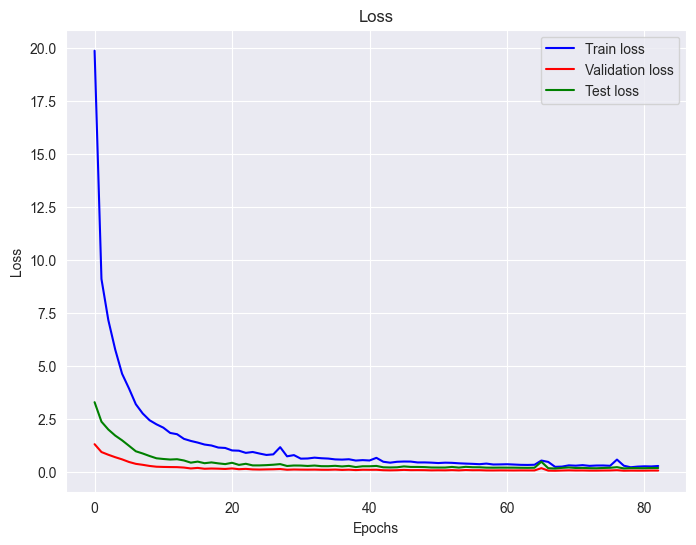

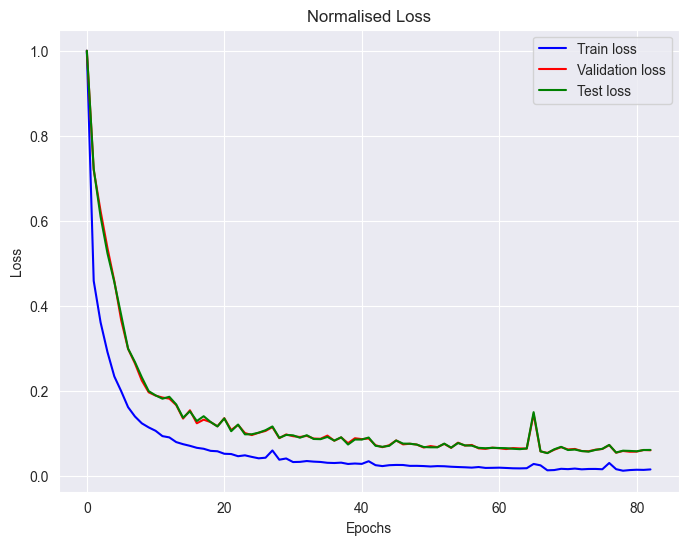

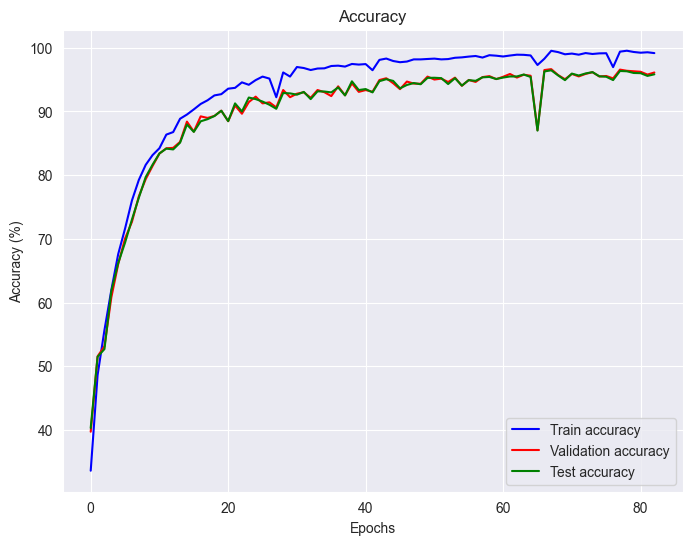

In [8]:
# Ustawienie ścieżki do zapisu
save_path = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result/figures/Setnetcond_mono_const_plots'

# BEST RESULTS
print('Best Train Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Best Val Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Test Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

# LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_losses, 'b', label='Train loss')
plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
plt.plot(epochs, all_test_losses, 'g', label='Test loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# NORMALISED LOSS
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
plt.title('Normalised Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{save_path}/normalised_loss_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

# ACCURACY
all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
epochs = range(0, len(all_train_losses))
plt.figure(figsize=(8,6))
plt.grid(True)  # Włącza siatkę
plt.plot(epochs, all_train_perc_correct, 'b', label='Train accuracy')
plt.plot(epochs, all_val_perc_correct, 'r', label='Validation accuracy')
plt.plot(epochs, all_test_perc_correct, 'g', label='Test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig(f'{save_path}/accuracy_plot.jpeg', format='jpeg')  # Zapisuje wykres w formacie JPEG
plt.show()

In [9]:
# Wyodrębnienie kolumn przy użyciu list comprehensions
test_indexes_mono_cont = [x[0] for x in best_test_results]
test_filenames_mono_cont = [x[1] for x in best_test_results]
test_preds_mono_cont = np.stack([x[2] for x in best_test_results])
test_targets_mono_cont = np.stack([x[3] for x in best_test_results])

# Obliczenia błędów
test_abs_err_mono_cont = np.abs(test_preds_mono_cont - test_targets_mono_cont)
test_err_mono_cont = test_preds_mono_cont - test_targets_mono_cont

# Tworzenie DataFrame
test_df_mono_cont = pd.DataFrame(data={
    'index': test_indexes_mono_cont, 
    'filename': test_filenames_mono_cont,
    'level_pred': test_preds_mono_cont[:, 0], 
    'gain_pred': test_preds_mono_cont[:, 1],
    'tone_eq1_pred': test_preds_mono_cont[:, 2], 
    'level_targ': test_targets_mono_cont[:, 0], 
    'gain_targ': test_targets_mono_cont[:, 1],
    'tone_eq1_targ': test_targets_mono_cont[:, 2], 
    'level_err': test_err_mono_cont[:, 0], 
    'gain_err': test_err_mono_cont[:, 1],
    'tone_eq1_err': test_err_mono_cont[:, 2], 
    'level_abs': test_abs_err_mono_cont[:, 0], 
    'gain_abs': test_abs_err_mono_cont[:, 1],
    'tone_eq1_abs': test_abs_err_mono_cont[:, 2], 
})

print(len(test_df_mono_cont))
test_df_mono_cont[:3]


26000


,index,filename,level_pred,gain_pred,tone_eq1_pred,level_targ,gain_targ,tone_eq1_targ,level_err,gain_err,tone_eq1_err,level_abs,gain_abs,tone_eq1_abs
0,31122,G61-70606-DPL-D5.3-20664,1.0,0.541,-1.000,1.0,0.53,-1.00,0.0,0.011,0.000,0.0,0.011,0.000
1,100867,G61-64505-SD1-D2.5T6.4-20650,1.0,0.261,0.595,1.0,0.25,0.64,0.0,0.011,-0.045,0.0,0.011,0.045
2,118301,G91-64505-TS9-D9.1T8.6-21118,1.0,0.878,0.804,1.0,0.91,0.86,0.0,-0.032,-0.056,0.0,0.032,0.056


In [10]:
# MAE
level_mae_mono_cont = sum(test_df_mono_cont.level_abs)/test_set_size
gain_mae_mono_cont = sum(test_df_mono_cont.gain_abs)/test_set_size
tone_eq1_mae_mono_cont = sum(test_df_mono_cont.tone_eq1_abs)/test_set_size

print('level_mae: ', level_mae_mono_cont)
print('gain_mae: ', gain_mae_mono_cont)
print('tone_eq1_mae: ', tone_eq1_mae_mono_cont)

# RMSE
level_rmse_mono_cont = math.sqrt(sum(test_df_mono_cont.level_abs**2)/test_set_size)
gain_rmse_mono_cont = math.sqrt(sum(test_df_mono_cont.gain_abs**2)/test_set_size)
tone_eq1_rmse_mono_cont = math.sqrt(sum(test_df_mono_cont.tone_eq1_abs**2)/test_set_size)

print('level_rmse: ', level_rmse_mono_cont)
print('gain_rmse: ', gain_rmse_mono_cont)
print('tone_eq1_rmse: ', tone_eq1_rmse_mono_cont)

level_mae:  3.846104328448956e-08
gain_mae:  0.02235334643544271
tone_eq1_mae:  0.024518923171204875
level_rmse:  6.201657049810024e-06
gain_rmse:  0.031150664755942168
tone_eq1_rmse:  0.04141296533941425


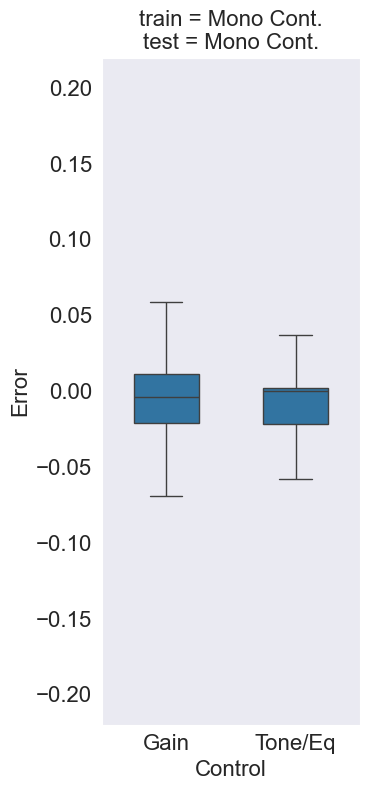

In [11]:
# BOX PLOT
err_df_mono_cont = pd.DataFrame(data={
    'Gain': test_df_mono_cont['gain_err'],
    'Tone/Eq': test_df_mono_cont['tone_eq1_err'],
})

plt.figure(figsize=(3.8,8))
plt.grid(False)
ax = utils.box_plot(error_dataframe=err_df_mono_cont, title='train = Mono Cont.\ntest = Mono Cont.', title_fontsize=16, text_fontsize=16)
ax.set(ylim=(-0.22,0.22))
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_bp_MC_MC.eps'), format='eps')

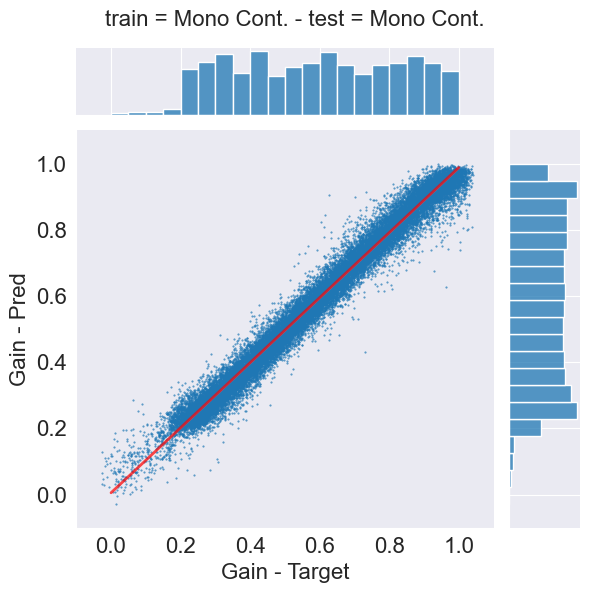

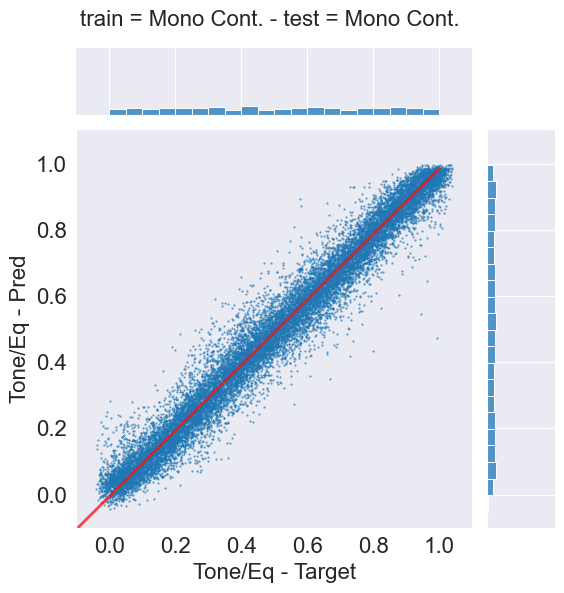

In [12]:
# SCATTER PLOT
# gain
ax = utils.scatter_plot(
    x="gain_targ", y="gain_pred", dataframe=test_df_mono_cont, 
    title='train = Mono Cont. - test = Mono Cont.', title_fontsize=16, 
    text_fontsize=16, xlabel='Gain - Target', ylabel='Gain - Pred'
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)

plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_gain_MC_MC.jpg'), dpi=500, format='jpg')

# tone/eq1
ax = utils.scatter_plot(
    x="tone_eq1_targ", y="tone_eq1_pred", dataframe=test_df_mono_cont, 
    title='train = Mono Cont. - test = Mono Cont.', title_fontsize=16, 
    text_fontsize=16, xlabel='Tone/Eq - Target', ylabel='Tone/Eq - Pred',
    bins=40
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)

plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_tone_MC_MC.jpg'), dpi=500, format='jpg')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


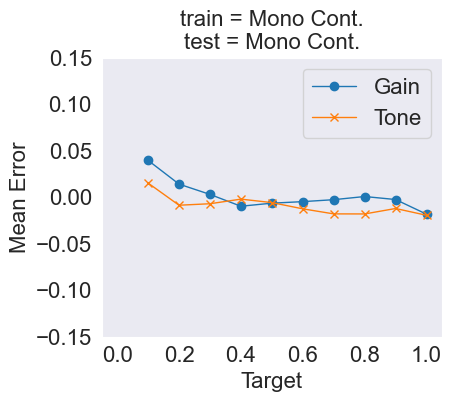

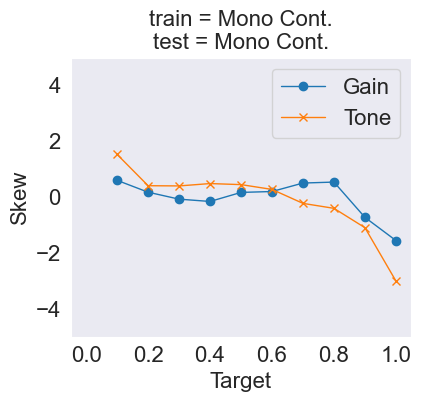

In [13]:
# MEAN ERROR and SKEW PLOT
step_size = 0.1
steps = np.linspace(start=0, stop=1, num=int(1/step_size + 1))
avg_err_gain = []
avg_err_tone = []
skew_gain = []
skew_tone = []

for n in range(len(steps)-1):
    df = test_df_mono_cont[(test_df_mono_cont['gain_targ'] >= steps[n]) & (test_df_mono_cont['gain_targ'] < steps[n+1])]
    avg_err_gain.append(sum(df['gain_err']) / len(df))
    skew_gain.append(scipy.stats.skew(df['gain_err']))

for n in range(len(steps)-1):
    df = test_df_mono_cont[(test_df_mono_cont['tone_eq1_targ'] >= steps[n]) & (test_df_mono_cont['tone_eq1_targ'] < steps[n+1])]
    avg_err_tone.append(sum(df['tone_eq1_err']) / len(df))
    skew_tone.append(scipy.stats.skew(df['tone_eq1_err']))

# print(np.around(avg_err_gain,3))
# print(np.around(avg_err_tone,3))

# mean error
plt.figure(figsize=(4.8,4.3))
utils.line_plot(
    x_gain=steps[1:], x_tone=steps[1:], 
    y_gain=avg_err_gain, y_tone=avg_err_tone, 
    title='train = Mono Cont.\ntest = Mono Cont.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Mean Error'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.15, 0.15])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_me_MC_MC.eps'), format='eps')

# skew
plt.figure(figsize=(4.5,4.3))
ax = utils.line_plot(
    x_gain=steps[1:], x_tone=steps[1:], 
    y_gain=skew_gain, y_tone=skew_tone, 
    title='train = Mono Cont.\ntest = Mono Cont.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Skew'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-5, 5])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sk_MC_MC.eps'), format='eps')

# TEST on MONO DISCRETE

In [14]:
# PREPARE
# dataset
dataset_mono_disc = dataset.FxDataset(
    root='G:/PracaMagisterska/Dane/Mono_Discret_Audio',
    excl_folders=['MT2'], 
    spectra_folder='mel_22050_1024_512', 
    processed_settings_csv='proc_settings.csv',
    max_num_settings=3,
    transform=transforms.Compose([transforms.ToTensor()])
)

dataset_mono_disc.init_dataset()
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono_disc = datasplit.DataSplit(dataset_mono_disc, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono_disc = split_mono_disc.get_split(batch_size=100)

len(dataset_mono_disc)

123552

In [15]:
# TEST
test_mono_disc_loss, test_mono_disc_correct, test_mono_disc_results = trainer.test_settings_cond_net(
    model=setnetcond, 
    test_loader=test_loader_mono_disc, 
    test_sampler=split_mono_disc.test_sampler,
    loss_function=nn.MSELoss(), 
    device='cpu'
)

# example
test_mono_disc_results[0]

====> Test Loss: 5.1003	 Avg Loss: 0.0000	Correct: 107044/123552	Percentage Correct: 86.64


(11666,
 'G93-58308-808-O2T10-21173',
 array([1.   , 0.226, 0.992], dtype=float32),
 array([1. , 0.2, 1. ], dtype=float32))

In [16]:
# Wyodrębnienie kolumn przy użyciu list comprehensions
test_indexes_mono_disc = [x[0] for x in best_test_results]
test_filenames_mono_disc = [x[1] for x in best_test_results]
test_preds_mono_disc = np.stack([x[2] for x in best_test_results])
test_targets_mono_disc = np.stack([x[3] for x in best_test_results])

# Obliczenia błędów
test_abs_err_mono_disc = np.abs(test_preds_mono_disc - test_targets_mono_disc)
test_err_mono_disc = test_preds_mono_disc - test_targets_mono_disc

# Tworzenie DataFrame
test_df_mono_disc = pd.DataFrame(data={
    'index': test_indexes_mono_disc, 
    'filename': test_filenames_mono_disc,
    'level_pred': test_preds_mono_disc[:, 0], 
    'gain_pred': test_preds_mono_disc[:, 1],
    'tone_eq1_pred': test_preds_mono_disc[:, 2], 
    'level_targ': test_targets_mono_disc[:, 0], 
    'gain_targ': test_targets_mono_disc[:, 1],
    'tone_eq1_targ': test_targets_mono_disc[:, 2], 
    'level_err': test_err_mono_disc[:, 0], 
    'gain_err': test_err_mono_disc[:, 1],
    'tone_eq1_err': test_err_mono_disc[:, 2], 
    'level_abs': test_abs_err_mono_disc[:, 0], 
    'gain_abs': test_abs_err_mono_disc[:, 1],
    'tone_eq1_abs': test_abs_err_mono_disc[:, 2], 
})

print(len(test_df_mono_disc))
test_df_mono_disc[:3]


26000


,index,filename,level_pred,gain_pred,tone_eq1_pred,level_targ,gain_targ,tone_eq1_targ,level_err,gain_err,tone_eq1_err,level_abs,gain_abs,tone_eq1_abs
0,31122,G61-70606-DPL-D5.3-20664,1.0,0.541,-1.000,1.0,0.53,-1.00,0.0,0.011,0.000,0.0,0.011,0.000
1,100867,G61-64505-SD1-D2.5T6.4-20650,1.0,0.261,0.595,1.0,0.25,0.64,0.0,0.011,-0.045,0.0,0.011,0.045
2,118301,G91-64505-TS9-D9.1T8.6-21118,1.0,0.878,0.804,1.0,0.91,0.86,0.0,-0.032,-0.056,0.0,0.032,0.056


In [17]:
# MAE
level_mae_mono_disc = sum(test_df_mono_disc.level_abs)/len(test_df_mono_disc)
gain_mae_mono_disc = sum(test_df_mono_disc.gain_abs)/len(test_df_mono_disc)
tone_eq1_mae_mono_disc = sum(test_df_mono_disc.tone_eq1_abs)/len(test_df_mono_disc)

print('level_mae: ', level_mae_mono_disc)
print('gain_mae: ', gain_mae_mono_disc)
print('tone_eq1_mae: ', tone_eq1_mae_mono_disc)

# RMSE
level_rmse_mono_disc = math.sqrt(sum(test_df_mono_disc.level_abs**2)/len(test_df_mono_disc))
gain_rmse_mono_disc = math.sqrt(sum(test_df_mono_disc.gain_abs**2)/len(test_df_mono_disc))
tone_eq1_rmse_mono_disc = math.sqrt(sum(test_df_mono_disc.tone_eq1_abs**2)/len(test_df_mono_disc))

print('level_rmse: ', level_rmse_mono_disc)
print('gain_rmse: ', gain_rmse_mono_disc)
print('tone_eq1_rmse: ', tone_eq1_rmse_mono_disc)

level_mae:  3.846104328448956e-08
gain_mae:  0.02235334643544271
tone_eq1_mae:  0.024518923171204875
level_rmse:  6.201657049810024e-06
gain_rmse:  0.031150664755942168
tone_eq1_rmse:  0.04141296533941425


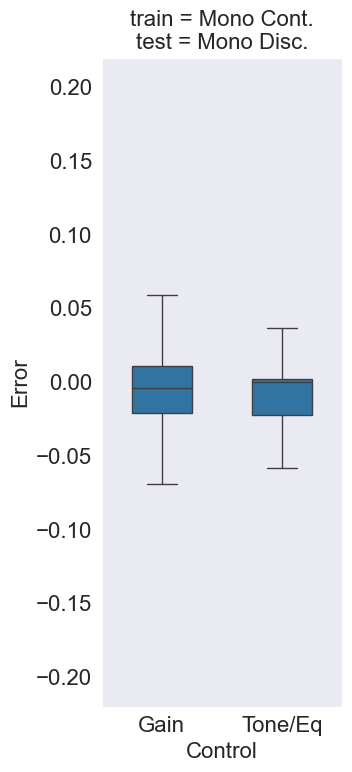

In [18]:
# BOX PLOT
err_df_mono_disc = pd.DataFrame(data={
    'Gain': test_df_mono_disc['gain_err'],
    'Tone/Eq': test_df_mono_disc['tone_eq1_err'],
})

plt.figure(figsize=(3.8,8))
plt.grid(False)
ax = utils.box_plot(error_dataframe=err_df_mono_disc, title='train = Mono Cont.\ntest = Mono Disc.', title_fontsize=16, text_fontsize=16)
ax.set(ylim=(-0.22,0.22))
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_bp_MC_MD.eps'), format='eps')

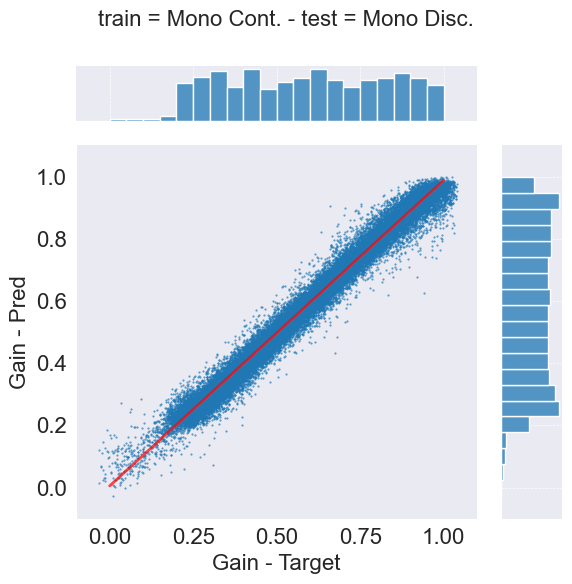

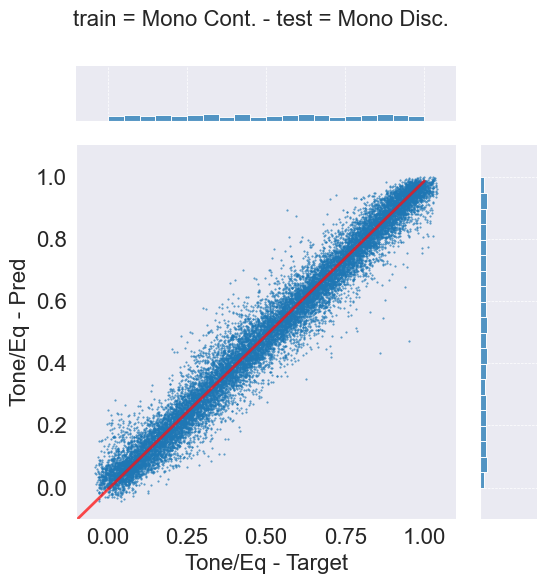

In [19]:
# SCATTER PLOT
# gain
ax = utils.scatter_plot(
    x="gain_targ", y="gain_pred", dataframe=test_df_mono_disc, 
    title='train = Mono Cont. - test = Mono Disc.', title_fontsize=16, 
    text_fontsize=16, xlabel='Gain - Target', ylabel='Gain - Pred'
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)

plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_gain_MC_MD.png'), format='png')

# tone/eq1
ax = utils.scatter_plot(
    x="tone_eq1_targ", y="tone_eq1_pred", dataframe=test_df_mono_disc, 
    title='train = Mono Cont. - test = Mono Disc.', title_fontsize=16, 
    text_fontsize=16, xlabel='Tone/Eq - Target', ylabel='Tone/Eq - Pred',
    bins=40
)

ax.ax_marg_x.set_xlim(-0.1, 1.1)
ax.ax_marg_y.set_ylim(-0.1, 1.1)

plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sp_tone_MC_MD.png'), format='png')

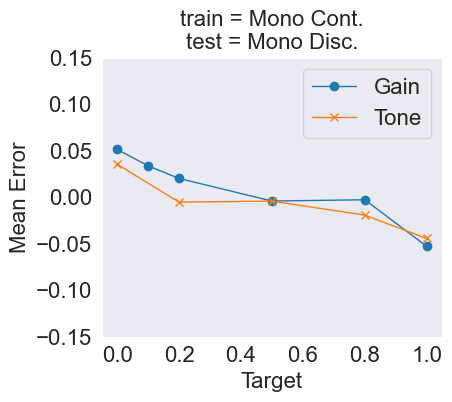

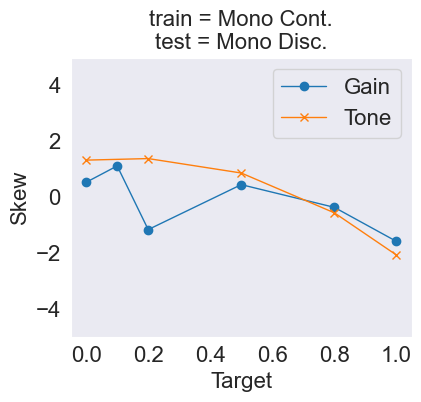

In [20]:
# MEAN ERROR and SKEW PLOTS
steps_gain = [0.0, 0.1, 0.2, 0.5, 0.8, 1.0]
steps_tone = [0.0, 0.2, 0.5, 0.8, 1.0]
avg_err_gain = []
avg_err_tone = []
skew_gain = []
skew_tone = []

for n in range(len(steps_gain)):
    df = test_df_mono_disc[test_df_mono_disc['gain_targ'] == steps_gain[n]]
    avg_err_gain.append(sum(df['gain_err']) / len(df))
    skew_gain.append(scipy.stats.skew(df['gain_err']))

for n in range(len(steps_tone)):
    df = test_df_mono_disc[test_df_mono_disc['tone_eq1_targ'] == steps_tone[n]]
    avg_err_tone.append(sum(df['tone_eq1_err']) / len(df))
    skew_tone.append(scipy.stats.skew(df['tone_eq1_err']))

# print(np.around(avg_err_gain,3))
# print(np.around(avg_err_tone,3))
# print(np.around(skew_gain,3))
# print(np.around(skew_tone,3))

# mean error
plt.figure(figsize=(4.8,4.3))
utils.line_plot(
    x_gain=steps_gain, x_tone=steps_tone, 
    y_gain=avg_err_gain, y_tone=avg_err_tone, 
    title='train = Mono Cont.\ntest = Mono Disc.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Mean Error'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.15, 0.15])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_me_MC_MD.eps'), format='eps')

# skew
plt.figure(figsize=(4.5,4.3))
utils.line_plot(
    x_gain=steps_gain, x_tone=steps_tone, 
    y_gain=skew_gain, y_tone=skew_tone, 
    title='train = Mono Cont.\ntest = Mono Disc.' , title_fontsize=16, 
    text_fontsize=16, xlabel='Target', ylabel='Skew'
)

plt.xlim([-0.05, 1.05])
plt.ylim([-5, 5])
plt.grid(False)
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'setnetcond_sk_MC_MD.eps'), format='eps')